Loading the 3 OCW complaint datasets into 3 dataframes

In [58]:
import pandas as pd
import os
import numpy as np
from datetime import datetime as dt
os.chdir("D:/charles/rheobot/presentations/OCW/data-new")
complaints2017 = pd.read_csv("Complaint_data_2017.csv")

complaints2018 = pd.read_csv("Complaint_data_2018_a.csv")
#complaints2018 = complaints2018[complaints2018['Days taken to resolve the problem'].apply(lambda x: type(x) in [int, np.int64, float, np.float64])]
complaints2018 = complaints2018[pd.to_numeric(complaints2018['Days taken to resolve the problem'], errors='coerce').notnull()]
# complaints2018['Complaint Date'] = dt.strftime((dt.strptime(complaints2018['Complaint Date'], "%d.%m.%Y")), "%d-%m-%Y")
complaints2018['Complaint Date'] = complaints2018['Complaint Date'].apply(lambda x: dt.strftime((dt.strptime(x, "%d.%m.%Y")), "%d-%m-%Y")) 
complaints2019 = pd.read_csv("Complaint_data_2019.csv")

C:\Users\Charles David\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Checking the shape

In [186]:
complaints2017.shape

(25632, 34)

In [187]:
complaints2018.shape

(43457, 34)

In [188]:
complaints2019.shape

(20629, 34)

In [80]:
complaintstemp = pd.read_csv("Complaint_data_temp_3.csv")
complaintstemp['ZONE DESCRIPTION'] = complaintstemp['ZONE DESCRIPTION'].astype('category').cat.codes
complaintstemp.shape
complaintstemp.corr(method='spearman')

,ZONE DESCRIPTION,FREQ
ZONE DESCRIPTION,1.000000,-0.036206
FREQ,-0.036206,1.000000


**Very weak correlation between frequency and zone**

**Describing the data**

In [189]:
complaints2017.describe()

,Complaint Number,Notification No,Mobile,Days taken to resolve the problem,Pending Days for Open Complaints,ZONE CODE,ESR Code,Order No.,External Material(715991),External Service(7120006),Store Consuptions(7150001),Internal Cost,Total Cost
count,2.563200e+04,2.563200e+04,0.0,25632.000000,0.0,25616.000000,13097.000000,1.413700e+04,25632.0,25632.000000,25632.000000,25632.0,25632.000000
mean,5.010457e+06,1.004472e+07,NaN,14.547826,NaN,5.624649,34.299076,5.031101e+06,0.0,473.976009,239.707219,0.0,713.683227
std,1.998162e+08,1.037604e+04,NaN,30.964301,NaN,2.972934,20.081545,1.073363e+04,0.0,1288.166759,1948.368271,0.0,2704.804214
min,1.000000e+00,1.002541e+07,NaN,0.000000,NaN,1.000000,1.000000,4.007367e+06,0.0,0.000000,0.000000,0.0,0.000000
25%,8.689750e+03,1.003622e+07,NaN,2.100000,NaN,3.000000,16.000000,5.025883e+06,0.0,0.000000,0.000000,0.0,0.000000
50%,1.675050e+04,1.004475e+07,NaN,4.990000,NaN,6.000000,32.000000,5.031016e+06,0.0,0.000000,0.000000,0.0,0.000000
75%,2.486950e+04,1.005348e+07,NaN,12.260000,NaN,8.000000,53.000000,5.036520e+06,0.0,493.800000,0.000000,0.0,685.190000
max,8.000000e+09,1.010027e+07,NaN,386.960000,NaN,10.000000,68.000000,5.070406e+06,0.0,47235.790000,105529.560000,0.0,112640.280000


In [49]:
complaints2018.describe()

,Complaint Number,Notification No,Assignment Group,Pending Days for Open Complaints,ZONE CODE,ESR Code,Order No.,External Material(715991),External Service(7120006),Store Consuptions(7150001),Internal Cost,Total Cost
count,4.345700e+04,4.345700e+04,43457.0,43457.0,43457.000000,43457.000000,4.345700e+04,43457.0,43457.000000,43457.00000,43457.0,43457.000000
mean,1.903828e+06,1.009293e+07,0.0,0.0,5.504913,21.676853,2.532404e+06,0.0,466.868697,193.38236,0.0,660.251057
std,1.213422e+08,1.731576e+04,0.0,0.0,2.938861,22.704010,2.529588e+06,0.0,1255.766972,2285.56180,0.0,2850.838988
min,3.284300e+04,1.006246e+07,0.0,0.0,0.000000,0.000000,0.000000e+00,0.0,0.000000,0.00000,0.0,0.000000
25%,4.631600e+04,1.007806e+07,0.0,0.0,3.000000,0.000000,0.000000e+00,0.0,0.000000,0.00000,0.0,0.000000
50%,6.183800e+04,1.009295e+07,0.0,0.0,5.000000,15.000000,5.041729e+06,0.0,0.000000,0.00000,0.0,0.000000
75%,7.972700e+04,1.010797e+07,0.0,0.0,8.000000,39.000000,5.059497e+06,0.0,545.050000,0.00000,0.0,654.780000
max,8.000000e+09,1.012329e+07,0.0,0.0,10.000000,68.000000,5.080154e+06,0.0,40968.350000,294166.39000,0.0,296642.870000


In [191]:
complaints2019.describe()

,Complaint Number,Notification No,Mobile,Days taken to resolve the problem,Pending Days for Open Complaints,ZONE CODE,ESR Code,Order No.,External Material(715991),External Service(7120006),Store Consuptions(7150001),Internal Cost,Total Cost
count,20629.000000,2.062900e+04,0.0,20629.000000,255.000000,20629.000000,14123.000000,9.802000e+03,20629.0,20629.000000,20629.000000,20629.0,20629.000000
mean,110512.338165,1.013767e+07,NaN,6.778408,36.992157,5.669931,33.306309,5.083237e+06,0.0,612.944381,136.704580,0.0,749.648961
std,9068.387449,8.318573e+03,NaN,10.301679,33.820973,2.984021,19.736396,4.728278e+03,0.0,6329.719516,995.316609,0.0,6469.443055
min,95143.000000,1.012316e+07,NaN,0.000000,4.000000,1.000000,1.000000,5.074796e+06,0.0,0.000000,0.000000,0.0,0.000000
25%,102554.000000,1.013046e+07,NaN,1.940000,12.000000,3.000000,16.000000,5.079189e+06,0.0,0.000000,0.000000,0.0,0.000000
50%,110462.000000,1.013767e+07,NaN,3.800000,24.000000,6.000000,32.000000,5.083000e+06,0.0,0.000000,0.000000,0.0,0.000000
75%,118400.000000,1.014485e+07,NaN,7.200000,53.000000,8.000000,51.000000,5.087315e+06,0.0,810.420000,0.000000,0.0,888.800000
max,126339.000000,1.015229e+07,NaN,139.020000,155.000000,10.000000,68.000000,5.091624e+06,0.0,889054.920000,55963.800000,0.0,889054.920000


# Analysis from Describe
**1. The average time taken to resolve problems has come down from 14.54 days to 6.77 days. Also around 75% of the problems in 2019 were solved in 7.2 days**

In [2]:
tempDf = complaints2017.append(complaints2018, sort = False)
tempDf
tempDf.shape

(69089, 34)

**Appending all the 3 years complaints data into a single dataframe**

In [3]:
allcomplaints = tempDf.append(complaints2019, sort = False)
allcomplaints
allcomplaints.shape

(89718, 34)

In [261]:
complaints2017.dtypes

Complaint Date                        object
Complaint Number                       int64
Complaint Category                    object
Notification No                        int64
Complaint Status                      object
Status Details                        object
Caller Type                           object
Source of Complaints                  object
Business Partner Type                 object
Complaint Received From               object
Consumer Name                         object
Address                               object
Mobile                               float64
CAN/CIN                               object
Assignment Group                      object
Description                           object
Action Taken                          object
Assigned To                           object
Solved Date                           object
Solved By                             object
Days taken to resolve the problem    float64
Pending Days for Open Complaints     float64
Complaint 

# Calculating Average Complaints Per Day

**Average complaints per day for 2017**

In [139]:
from datetime import datetime as dt
dateDiff2017 = dt.strptime(complaints2017['Complaint Date'].max(), "%d-%m-%Y") - dt.strptime(complaints2017['Complaint Date'].min(), "%d-%m-%Y")
count2017 = complaints2017.shape[0]
print ("Number of days in 2017 is:", dateDiff2017.days)
avg2017 = count2017 / dateDiff2017.days
avg2017

Number of days in 2017 is: 213


120.33802816901408

**Average complaints per day for 2018**

In [140]:
from datetime import datetime as dt
dateDiff2018 = dt.strptime(complaints2018['Complaint Date'].max(), "%d.%m.%Y") - dt.strptime(complaints2018['Complaint Date'].min(), "%d.%m.%Y")
count2018 = complaints2018.shape[0]
print ("Number of days in 2018 is:", dateDiff2018.days)
avg2018 = count2018 / dateDiff2018.days
avg2018

Number of days in 2018 is: 364


119.38736263736264

**Average complaints per day for 2019**

In [141]:
from datetime import datetime as dt
dateDiff2019 = dt.strptime(complaints2019['Complaint Date'].max(), "%d-%m-%Y") - dt.strptime(complaints2019['Complaint Date'].min(), "%d-%m-%Y")
count2019 = complaints2019.shape[0]
print ("Number of days in 2019 is:", dateDiff2019.days)
avg2019 = count2019 / dateDiff2019.days
avg2019

Number of days in 2019 is: 150


137.52666666666667

**Average complaints per day have increased from 120 per day in 2017 to 137 per day in 2019. However this could be due to increase in connections for which data is unavailable as of now**

# Calculating Average Response Time

In [96]:
complaints2017['Days taken to resolve the problem'].mean()

14.547825764669163

In [125]:
#complaints2018['Days taken to resolve the problem'].dtype
import pandas as pd
pd.to_numeric(complaints2018['Days taken to resolve the problem']).mean()

7.949589479255357

In [126]:
complaints2019['Days taken to resolve the problem'].mean()

6.778408066314413

# Product / Complaint Analysis

**Bar chart of number of complaints per type / category**

TECHNICAL COMPLAINTS     21050
COMMERCIAL COMPLAINTS     4082
CAPEX COMPLAINTS           499
Name: Complaint Category, dtype: int64


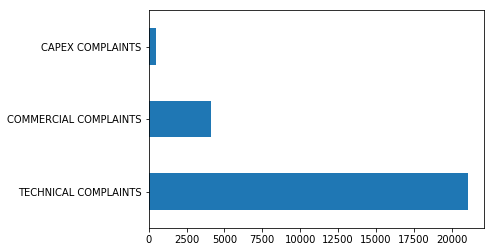

In [5]:
%matplotlib inline
import matplotlib.pyplot
complaints2017['Complaint Category'].value_counts().plot(kind='barh')
print (complaints2017['Complaint Category'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

TECHNICAL COMPLAINTS     34332
COMMERCIAL COMPLAINTS     8408
CAPEX COMPLAINTS           716
Name: Complaint Category, dtype: int64


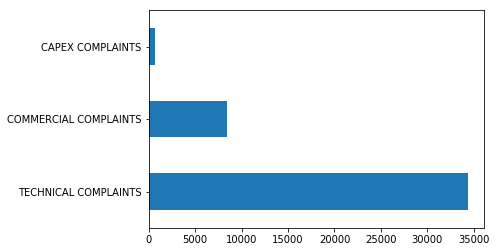

In [137]:
%matplotlib inline
import matplotlib.pyplot
complaints2018['Complaint Category'].value_counts().plot(kind='barh')
print (complaints2018['Complaint Category'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

TECHNICAL COMPLAINTS     16624
COMMERCIAL COMPLAINTS     3723
CAPEX COMPLAINTS           282
Name: Complaint Category, dtype: int64


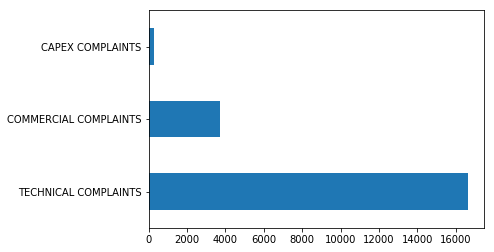

In [138]:
%matplotlib inline
import matplotlib.pyplot
complaints2019['Complaint Category'].value_counts().plot(kind='barh')
print (complaints2019['Complaint Category'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

**The technical complaints are significantly higher than commercial complaints. The capex complaints are very less**

LEAKAGES                           7300
NO WATER                           4470
WATER PRESSURE                     2990
BILL NOT RECEIVED                  2318
WORK QUALITY                       1751
BORE WELL                          1642
ACCESSORIES DAMAGED                1413
WATER QUALITY                      1338
WRONG INVOICE / AVERAGE BILLING    1057
COMPLAINTS RELATED TO METER         277
WORK QUALITY: RESTORATION           216
WORK QUALITY: OTHER                 166
AIR IN THE PIPE                     103
WRONG READING                        96
UNREGISTERED WATER CONNECTION        86
NEW CONNECTION                       86
WORK QUALITY: HSC LEAKAGE            58
BOOSTER PUMP                         47
RE-CONNECTION                        46
DISCONTINUATION OF WATER SUPPLY      38
WRONG NAME & ADDRESS                 36
WORK QUALITY: NO WATER               30
WORK QUALITY: OPEN PIT               26
COMPLAINT RELATED TO CATEGORY        24
TANKER                                2


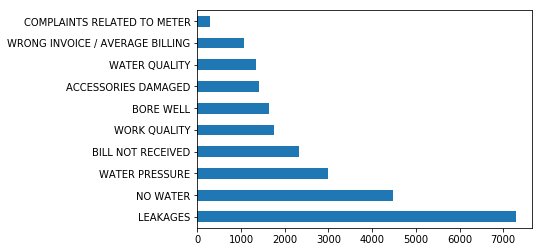

In [143]:
%matplotlib inline
import matplotlib.pyplot
complaints2017['Complaint Type'].value_counts().head(10).plot(kind='barh')
print (complaints2017['Complaint Type'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

LEAKAGES                           12117
NO WATER                            7993
WATER PRESSURE                      6414
WRONG INVOICE / AVERAGE BILLING     4256
WORK QUALITY                        3208
BILL NOT RECEIVED                   2722
ACCESSORIES DAMAGED                 2368
WATER QUALITY                       2121
COMPLAINTS RELATED TO METER          549
WORK QUALITY: RESTORATION            295
WORK QUALITY: OTHER                  264
AIR IN THE PIPE                      193
BOOSTER PUMP                         134
UNREGISTERED WATER CONNECTION        128
COMPLAINT RELATED TO CATEGORY        127
WRONG READING                        121
NEW CONNECTION                        80
WORK QUALITY: NO WATER                68
WRONG NAME & ADDRESS                  68
DISCONTINUATION OF WATER SUPPLY       62
RE-CONNECTION                         62
WORK QUALITY: HSC LEAKAGE             61
WORK QUALITY: OPEN PIT                21
METER STOLEN                           6
TANKER          

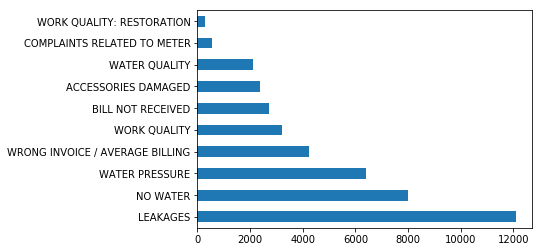

In [144]:
%matplotlib inline
import matplotlib.pyplot
complaints2018['Complaint Type'].value_counts().head(10).plot(kind='barh')
print (complaints2018['Complaint Type'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

LEAKAGES                           6575
NO WATER                           4298
WATER PRESSURE                     2732
WRONG INVOICE / AVERAGE BILLING    2381
WATER QUALITY                      1151
WORK QUALITY                        944
BILL NOT RECEIVED                   754
ACCESSORIES DAMAGED                 714
COMPLAINTS RELATED TO METER         224
BOOSTER PUMP                        147
WORK QUALITY: RESTORATION           125
AIR IN THE PIPE                     109
UNREGISTERED WATER CONNECTION       102
WORK QUALITY: OTHER                  87
RE-CONNECTION                        68
COMPLAINT RELATED TO CATEGORY        51
WORK QUALITY: NO WATER               38
NEW CONNECTION                       25
DISCONTINUATION OF WATER SUPPLY      25
WORK QUALITY: HSC LEAKAGE            23
WRONG READING                        23
WRONG NAME & ADDRESS                 18
WORK QUALITY: OPEN PIT                6
TANKER                                2
METER STOLEN                          2


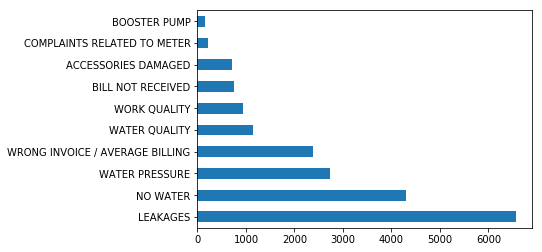

In [145]:
%matplotlib inline
import matplotlib.pyplot
complaints2019['Complaint Type'].value_counts().head(10).plot(kind='barh')
print (complaints2019['Complaint Type'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

LEAKAGES                           25992
NO WATER                           16761
WATER PRESSURE                     12136
WRONG INVOICE / AVERAGE BILLING     7694
WORK QUALITY                        5903
BILL NOT RECEIVED                   5794
WATER QUALITY                       4610
ACCESSORIES DAMAGED                 4495
BORE WELL                           1642
COMPLAINTS RELATED TO METER         1050
WORK QUALITY: RESTORATION            636
WORK QUALITY: OTHER                  517
AIR IN THE PIPE                      405
BOOSTER PUMP                         328
UNREGISTERED WATER CONNECTION        316
WRONG READING                        240
COMPLAINT RELATED TO CATEGORY        202
NEW CONNECTION                       191
RE-CONNECTION                        176
WORK QUALITY: HSC LEAKAGE            142
WORK QUALITY: NO WATER               136
DISCONTINUATION OF WATER SUPPLY      125
WRONG NAME & ADDRESS                 122
WORK QUALITY: OPEN PIT                53
METER STOLEN    

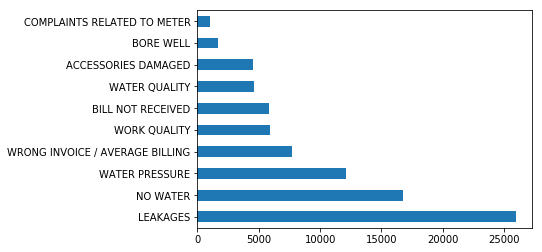

In [4]:
%matplotlib inline
import matplotlib.pyplot
allcomplaints['Complaint Type'].value_counts().head(10).plot(kind='barh')
print (allcomplaints['Complaint Type'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

**Percentage of complaints that can be automated**

In [13]:
len(allcomplaints.loc[allcomplaints['Complaint Type'].isin(['WRONG INVOICE / AVERAGE BILLING', 'BILL NOT RECEIVED', 'COMPLAINTS RELATED TO METER', 'WRONG READING', 'UNREGISTERED WATER CONNECTION', 'NEW CONNECTION', 'RE-CONNECTION', 'DISCONTINUATION OF WATER SUPPLY', 'WRONG NAME & ADDRESS'])]['Complaint Type']) * 100 / len(allcomplaints)

17.508192335986088

**About 17.5% complaints can be automated**

**Constructing a pareto chart of the issues**

In [34]:
import math
allcount = allcomplaints.groupby(['Complaint Type']).size()
alluniqueTypes = allcomplaints['Complaint Type'].unique()

allfreq = []
allTypes = []
for curType in alluniqueTypes:
    if type(curType) != float:
        allfreq.append(allcount[curType])
        allTypes.append(curType)
        
allfinAggDf = pd.DataFrame([allTypes, allfreq])
allfinAggDfT = allfinAggDf.T
allfinAggDfT.columns = ['type', 'freq']
print (allfinAggDfT)

                               type   freq
0                          NO WATER  16761
1                    WATER PRESSURE  12136
2                         BORE WELL   1642
3                          LEAKAGES  25992
4                     WATER QUALITY   4610
5                            BURSTS      2
6                      WORK QUALITY   5903
7               ACCESSORIES DAMAGED   4495
8                   AIR IN THE PIPE    405
9               WORK QUALITY: OTHER    517
10           WORK QUALITY: NO WATER    136
11        WORK QUALITY: RESTORATION    636
12                     BOOSTER PUMP    328
13           WORK QUALITY: OPEN PIT     53
14                BILL NOT RECEIVED   5794
15  WRONG INVOICE / AVERAGE BILLING   7694
16                   NEW CONNECTION    191
17    UNREGISTERED WATER CONNECTION    316
18                    RE-CONNECTION    176
19      COMPLAINTS RELATED TO METER   1050
20                    WRONG READING    240
21        WORK QUALITY: HSC LEAKAGE    142
22         

In [61]:
import matplotlib.pyplot as plt
def pareto_plot(df, x=None, y=None, title=None, show_pct_y=False, pct_format='{0:.0%}'):
    xlabel = x
    ylabel = y
    tmp = df.sort_values(y, ascending=False)
    x = tmp[x].values
    y = tmp[y].values
    weights = y / y.sum()
    cumsum = weights.cumsum()
    
    
    fig, ax1 = plt.subplots()
    ax1.bar(x, y)
    ax1.set_xlabel(xlabel)
    plt.xticks(rotation=90)
#     plt.figure(figsize=(9,5))
    ax1.set_ylabel(ylabel)

    ax2 = ax1.twinx()
    ax2.plot(x, cumsum, '-ro', alpha=0.5)
    ax2.set_ylabel('', color='r')
    ax2.tick_params('y', colors='r')
    
    vals = ax2.get_yticks()
    ax2.set_yticklabels(['{:,.2%}'.format(x) for x in vals])

    # hide y-labels on right side
    if not show_pct_y:
        ax2.set_yticks([])
    
    formatted_weights = [pct_format.format(x) for x in cumsum]
    for i, txt in enumerate(formatted_weights):
        ax2.annotate(txt, (x[i], cumsum[i]), fontweight='heavy')    
    
    if title:
        plt.title(title)
    
    plt.tight_layout()
    
    plt.show()

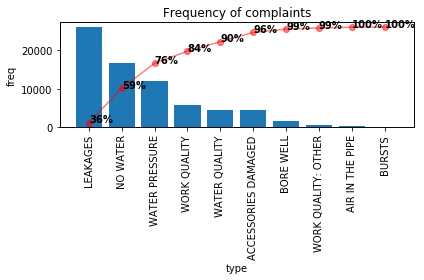

In [62]:
allfinAggDfT10 = allfinAggDfT.head(10) 
pareto_plot(allfinAggDfT10, x='type', y='freq', title='Frequency of complaints')

**From the pareto chart it is clear that 20% of the complaint types are causing 80% of the complaints. So if OCW focusses only on leakages, no water, water pressure and work quality then 80% of the complaints will be taken care of**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

paretoDf = allcomplaints
paretoDf.set_index('Complaint Type')
paretoDf = paretoDf.sort_values(by='Complaint Type',ascending=False)
paretoDf["cumpercentage"] = paretoDf["Complaint Type"].cumsum()*100/paretoDf["Complaint Type"].sum()


fig, ax = plt.subplots()
ax.bar(paretoDf.index, paretoDf["Complaint Type"], color="C0")
ax2 = ax.twinx()
ax2.plot(paretoDf.index, paretoDf["cumpercentage"], color="C1", marker="D", ms=7)
ax2.yaxis.set_major_formatter(PercentFormatter())

ax.tick_params(axis="y", colors="C0")
ax2.tick_params(axis="y", colors="C1")
plt.show()

MemoryError: 

SERVICE CONNECTION                         14899
NONE                                        6205
OTHERS                                      1526
DISTRIBUTION LINE-MEDIUM                    1045
DISTRIBUTION LINE-SMALL                      795
DISTRIBUTION LINE                            393
ESR                                          220
RESTORATION                                  213
DISTRIBUTION LINE-LARGE (400MM & ABOVE)      115
FEEDER MAIN-LARGE (400MM & ABOVE)             95
FEEDER MAIN-MEDIUM                            50
FEEDER MAIN-SMALL                             14
TRANSMISSION MAIN-LARGE (400MM & ABOVE)        8
FEEDER MAIN SMALL                              7
GSR                                            5
MBR                                            4
TRANSMISSION MAIN-MEDIUM                       4
TRANSMISSION MAIN-SMALL                        3
FEEDER MAIN                                    2
TRANSMISSION MAIN                              1
Name: Complaint Subc

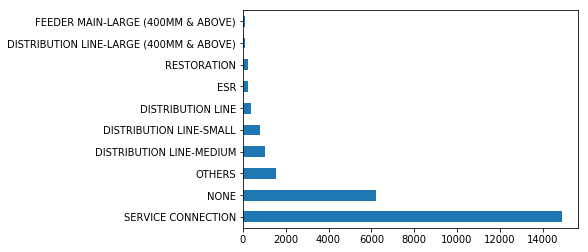

In [146]:
%matplotlib inline
import matplotlib.pyplot
complaints2017['Complaint Subcategory'].value_counts().head(10).plot(kind='barh')
print (complaints2017['Complaint Subcategory'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

SERVICE CONNECTION                         26187
NONE                                        9028
OTHERS                                      2533
DISTRIBUTION LINE-MEDIUM                    2394
DISTRIBUTION LINE-SMALL                     1124
DISTRIBUTION LINE                            839
RESTORATION                                  450
ESR                                          329
DISTRIBUTION LINE-LARGE (400MM & ABOVE)      203
FEEDER MAIN-LARGE (400MM & ABOVE)            151
FAULTY METER                                  77
FEEDER MAIN-MEDIUM                            59
0                                             40
FEEDER MAIN-SMALL                             15
GSR                                            7
TRANSMISSION MAIN-LARGE (400MM & ABOVE)        6
FEEDER MAIN SMALL                              6
MBR                                            2
TRANSMISSION MAIN                              2
FEEDER MAIN                                    2
TRANSMISSION MAIN-ME

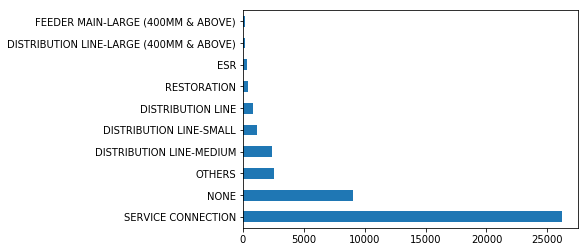

In [147]:
%matplotlib inline
import matplotlib.pyplot
complaints2018['Complaint Subcategory'].value_counts().head(10).plot(kind='barh')
print (complaints2018['Complaint Subcategory'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

SERVICE CONNECTION                         12992
NONE                                        3859
DISTRIBUTION LINE-MEDIUM                    1103
DISTRIBUTION LINE-SMALL                      692
OTHERS                                       691
DISTRIBUTION LINE                            483
ESR                                          219
RESTORATION                                  203
FAULTY METER                                 145
DISTRIBUTION LINE-LARGE (400MM & ABOVE)      106
FEEDER MAIN-LARGE (400MM & ABOVE)             84
FEEDER MAIN-MEDIUM                            35
TRANSMISSION MAIN-MEDIUM                       3
MBR                                            2
GSR                                            2
TRANSMISSION MAIN-SMALL                        1
FEEDER MAIN-SMALL                              1
FEEDER MAIN SMALL                              1
REPAIRS-MINOR                                  1
FEEDER MAIN                                    1
TRANSMISSION MAIN-LA

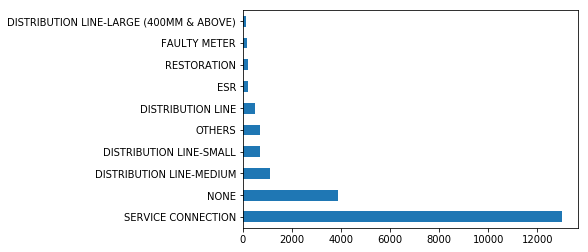

In [148]:
%matplotlib inline
import matplotlib.pyplot
complaints2019['Complaint Subcategory'].value_counts().head(10).plot(kind='barh')
print (complaints2019['Complaint Subcategory'].value_counts())
#plt.bar(complaints2017['Complaint Category'], complaints2017['Complaint Category'].value_counts())

**Difference in response times by product / type**

In [152]:
complaints2017Grp1 = complaints2017.groupby(['Complaint Category', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2017Grp1.mean(axis=1).head(10)

Complaint Category
CAPEX COMPLAINTS         0.109598
COMMERCIAL COMPLAINTS    0.896552
TECHNICAL COMPLAINTS     4.623325
dtype: float64

In [153]:
complaints2018Grp1 = complaints2018.groupby(['Complaint Category', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2018Grp1.mean(axis=1).head(10)

Complaint Category
CAPEX COMPLAINTS         0.186458
COMMERCIAL COMPLAINTS    2.189583
TECHNICAL COMPLAINTS     8.940625
dtype: float64

In [156]:
complaints2019Grp1 = complaints2019.groupby(['Complaint Category', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2019Grp1.mean(axis=1).head(10)

Complaint Category
CAPEX COMPLAINTS         0.105816
COMMERCIAL COMPLAINTS    1.396998
TECHNICAL COMPLAINTS     6.237899
dtype: float64

**The technical complaints are taking extraordinary long time to solve**

In [160]:
complaints2017Grp1a = complaints2017.groupby(['Complaint Type', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2017Grp1a.mean(axis=1)

Complaint Type
ACCESSORIES DAMAGED                0.310686
AIR IN THE PIPE                    0.022647
BILL NOT RECEIVED                  0.509675
BOOSTER PUMP                       0.010334
BORE WELL                          0.361038
BURSTS                             0.000220
COMPLAINT RELATED TO CATEGORY      0.005277
COMPLAINTS RELATED TO METER        0.060906
DISCONTINUATION OF WATER SUPPLY    0.008355
LEAKAGES                           1.605101
NEW CONNECTION                     0.018909
NO WATER                           0.982850
RE-CONNECTION                      0.010114
TANKER                             0.000440
UNREGISTERED WATER CONNECTION      0.018909
WATER PRESSURE                     0.657432
WATER QUALITY                      0.294195
WORK QUALITY                       0.385004
WORK QUALITY: HSC LEAKAGE          0.012753
WORK QUALITY: NO WATER             0.006596
WORK QUALITY: OPEN PIT             0.005717
WORK QUALITY: OTHER                0.036500
WORK QUALITY: RES

In [161]:
complaints2018Grp1a = complaints2018.groupby(['Complaint Type', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2018Grp1a.mean(axis=1)

Complaint Type
ACCESSORIES DAMAGED                0.617149
AIR IN THE PIPE                    0.050300
BILL NOT RECEIVED                  0.709408
BOOSTER PUMP                       0.034923
COMPLAINT RELATED TO CATEGORY      0.033099
COMPLAINTS RELATED TO METER        0.143081
DISCONTINUATION OF WATER SUPPLY    0.016158
LEAKAGES                           3.157936
METER STOLEN                       0.001564
NEW CONNECTION                     0.020850
NO WATER                           2.083138
RE-CONNECTION                      0.016158
TANKER                             0.000261
UNREGISTERED WATER CONNECTION      0.033359
WATER PRESSURE                     1.671618
WATER QUALITY                      0.552776
WORK QUALITY                       0.836070
WORK QUALITY: HSC LEAKAGE          0.015898
WORK QUALITY: NO WATER             0.017722
WORK QUALITY: OPEN PIT             0.005473
WORK QUALITY: OTHER                0.068804
WORK QUALITY: RESTORATION          0.076883
WRONG INVOICE / A

**Leakages are taking long time to fix. So is no-water**

In [162]:
complaints2019Grp1a = complaints2019.groupby(['Complaint Type', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2019Grp1a.mean(axis=1)

Complaint Type
ACCESSORIES DAMAGED                0.268219
AIR IN THE PIPE                    0.040947
BILL NOT RECEIVED                  0.283246
BOOSTER PUMP                       0.055222
BURSTS                             0.000376
COMPLAINT RELATED TO CATEGORY      0.019159
COMPLAINTS RELATED TO METER        0.084147
DISCONTINUATION OF WATER SUPPLY    0.009391
LEAKAGES                           2.469947
METER STOLEN                       0.000751
NEW CONNECTION                     0.009391
NO WATER                           1.614576
PUMPING STATION DOWN TIME          0.000376
RE-CONNECTION                      0.025545
TANKER                             0.000751
UNREGISTERED WATER CONNECTION      0.038317
WATER PRESSURE                     1.026296
WATER QUALITY                      0.432382
WORK QUALITY                       0.354621
WORK QUALITY: HSC LEAKAGE          0.008640
WORK QUALITY: NO WATER             0.014275
WORK QUALITY: OPEN PIT             0.002254
WORK QUALITY: OTH

**Leakages are taking long time to fix. So is no-water**

In [165]:
complaints2017Grp1b = complaints2017.groupby(['Complaint Subcategory', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2017Grp1b.mean(axis=1)

complaints2018Grp1b = complaints2018.groupby(['Complaint Subcategory', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2018Grp1b.mean(axis=1)

complaints2019Grp1b = complaints2019.groupby(['Complaint Subcategory', 'Days taken to resolve the problem']).size().unstack().fillna(0)
complaints2019Grp1b.mean(axis=1)

Complaint Subcategory
DISTRIBUTION LINE                          0.181443
DISTRIBUTION LINE-LARGE (400MM & ABOVE)    0.039820
DISTRIBUTION LINE-MEDIUM                   0.414350
DISTRIBUTION LINE-SMALL                    0.259955
ESR                                        0.082269
FAULTY METER                               0.054470
FEEDER MAIN                                0.000376
FEEDER MAIN SMALL                          0.000376
FEEDER MAIN-LARGE (400MM & ABOVE)          0.031555
FEEDER MAIN-MEDIUM                         0.013148
FEEDER MAIN-SMALL                          0.000376
GSR                                        0.000751
MBR                                        0.000751
NONE                                       1.449662
OTHERS                                     0.259579
REPAIRS-MINOR                              0.000376
RESTORATION                                0.076258
SERVICE CONNECTION                         4.880541
TRANSMISSION MAIN-LARGE (400MM & ABOVE)   

**Service connections take 3-4 days on average to fix**

# Customer Analysis

**No. of customers that have complained**

In [170]:
complaints2017['Consumer Name'].nunique()

16351

In [175]:
complaints2018['Consumer Name'].nunique()

26533

In [172]:
complaints2019['Consumer Name'].nunique()

13723

**No. of customers complaining per day**

In [179]:
complaints2017['Consumer Name'].nunique() / dateDiff2017.days

76.76525821596245

In [180]:
complaints2018['Consumer Name'].nunique() / dateDiff2018.days

72.89285714285714

In [181]:
complaints2019['Consumer Name'].nunique() / dateDiff2019.days

91.48666666666666

**Average complaints per customer**

In [182]:
complaints2017.shape[0] / complaints2017['Consumer Name'].nunique()

1.567610543697633

In [183]:
complaints2018.shape[0] / complaints2018['Consumer Name'].nunique()

1.6378472091357932

In [184]:
complaints2019.shape[0] / complaints2019['Consumer Name'].nunique()

1.5032427311812286

**Gender wise complaints**

female    12920
male      12594
Name: Gender, dtype: int64


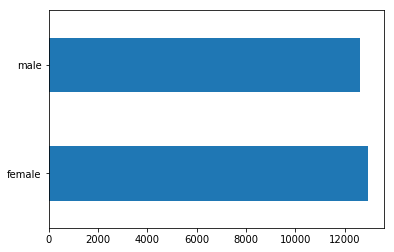

In [192]:
complaints2017['Gender'].value_counts().head(10).plot(kind='barh')
print (complaints2017['Gender'].value_counts())

female    23255
male      19607
Name: Gender, dtype: int64


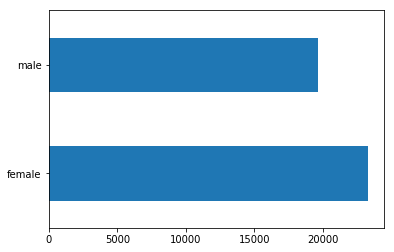

In [193]:
complaints2018['Gender'].value_counts().head(10).plot(kind='barh')
print (complaints2018['Gender'].value_counts())

female    11682
male       8908
Name: Gender, dtype: int64


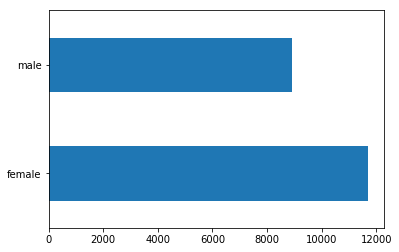

In [194]:
complaints2019['Gender'].value_counts().head(10).plot(kind='barh')
print (complaints2019['Gender'].value_counts())

**Female complaints tend to be more than the male complaints**

In [199]:
complaints2017Grp2a = complaints2017.groupby(['Complaint Category', 'Gender']).size().unstack().fillna(0)
print (complaints2017Grp2a)

print("******************")
complaints2017Grp2b = complaints2017.groupby(['Complaint Subcategory', 'Gender']).size().unstack().fillna(0)
print (complaints2017Grp2b)
print("******************")
complaints2017Grp2c = complaints2017.groupby(['Complaint Type', 'Gender']).size().unstack().fillna(0)
print (complaints2017Grp2c)

Gender                 female   male
Complaint Category                  
CAPEX COMPLAINTS          232    262
COMMERCIAL COMPLAINTS    2115   1955
TECHNICAL COMPLAINTS    10573  10376
******************
Gender                                   female    male
Complaint Subcategory                                  
DISTRIBUTION LINE                         192.0   198.0
DISTRIBUTION LINE-LARGE (400MM & ABOVE)    46.0    69.0
DISTRIBUTION LINE-MEDIUM                  514.0   526.0
DISTRIBUTION LINE-SMALL                   397.0   395.0
ESR                                       106.0   114.0
FEEDER MAIN                                 0.0     2.0
FEEDER MAIN SMALL                           3.0     4.0
FEEDER MAIN-LARGE (400MM & ABOVE)          45.0    48.0
FEEDER MAIN-MEDIUM                         27.0    23.0
FEEDER MAIN-SMALL                           7.0     7.0
GSR                                         2.0     3.0
MBR                                         1.0     3.0
NONE        

**There is no significance between gender and complaint type**

# Geographic Analysis

**Complaints per zone**

Ashinagar Zonal Office       3349
Lakadganj Zonal Office       3088
Dharampeth Zonal Office      2919
Hanumannagar Zonal Office    2664
Laxminagar Zonal Office      2569
Satranjipura Zonal Office    2562
Mangalwari Zonal Office      2518
Nehrunagar Zonal Office      2163
Dhantoli Zonal Office        1898
Gandhibag Zonal Office       1886
Name: ZONE DESCRIPTION, dtype: int64

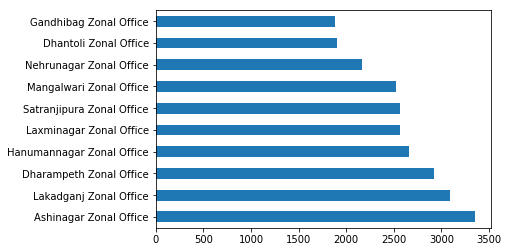

In [202]:
complaints2017['ZONE DESCRIPTION'].value_counts().plot(kind='barh')
complaints2017['ZONE DESCRIPTION'].value_counts()

Ashinagar Zonal Office       5436
Dharampeth Zonal Office      5428
Nehrunagar Zonal Office      4670
Hanumannagar Zonal Office    4582
Mangalwari Zonal Office      4233
Satranjipura Zonal Office    4225
Laxminagar Zonal Office      4160
Lakadganj Zonal Office       4000
Gandhibag Zonal Office       3717
Dhantoli Zonal Office        2996
0                              10
Name: ZONE DESCRIPTION, dtype: int64

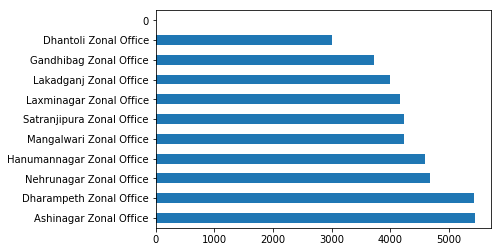

In [203]:
complaints2018['ZONE DESCRIPTION'].value_counts().plot(kind='barh')
complaints2018['ZONE DESCRIPTION'].value_counts()

Ashinagar Zonal Office       2996
Dharampeth Zonal Office      2695
Satranjipura Zonal Office    2239
Nehrunagar Zonal Office      2217
Mangalwari Zonal Office      2095
Lakadganj Zonal Office       2062
Laxminagar Zonal Office      1926
Hanumannagar Zonal Office    1881
Gandhibag Zonal Office       1383
Dhantoli Zonal Office        1135
Name: ZONE DESCRIPTION, dtype: int64

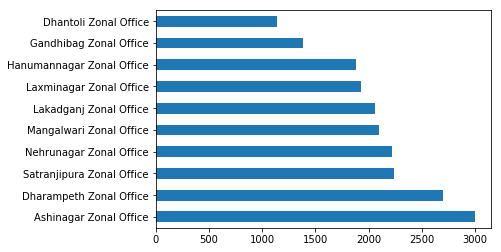

In [204]:
complaints2019['ZONE DESCRIPTION'].value_counts().plot(kind='barh')
complaints2019['ZONE DESCRIPTION'].value_counts()

**Ashinagar & Dharampeth have the most complaints over the past 3 years. Dhantoli and Gandhibag have the least complaints**

# Checking if there is correlation between zone and frequency of complaints

In [72]:
freqall = complaints2017['ZONE DESCRIPTION'].value_counts()
zonesall = complaints2017['ZONE DESCRIPTION'].unique()
zonesall = np.delete(zonesall, 10)
# zonesall = np.delete(zonesall, 10)
zonesall

array(['Satranjipura Zonal Office', 'Laxminagar Zonal Office',
       'Dharampeth Zonal Office', 'Lakadganj Zonal Office',
       'Nehrunagar Zonal Office', 'Hanumannagar Zonal Office',
       'Dhantoli Zonal Office', 'Mangalwari Zonal Office',
       'Gandhibag Zonal Office', 'Ashinagar Zonal Office'], dtype=object)

In [73]:
zoneGrp = complaints2017.groupby(['ZONE DESCRIPTION']).size()


zones2017All = []
freq2017All = []
temp2017All = []
for i in range(0, len(zonesall)):
    zones2017All.append(zonesall[i])
    freq2017All.append(zoneGrp[zonesall[i]])
    temp2017All.append(i)

zones2017All

newwAggDf2017 = pd.DataFrame([zones2017All, freq2017All, temp2017All])
newwAggDfT2017 = newwAggDf2017.T
newwAggDfT2017.columns = ['zones', 'freq', 'temp']
newwAggDfT2017

# allcomplaints.corr()
# newwAggDfT2017['zones'].corr(newwAggDfT2017['freq'])
# corrrr = newwAggDfT2017.corr(method ='kendall')
# corrrr
# zoneDf = pd.DataFrame(zonesall, freqall)


,zones,freq,temp
0,Satranjipura Zonal Office,2562,0
1,Laxminagar Zonal Office,2569,1
2,Dharampeth Zonal Office,2919,2
3,Lakadganj Zonal Office,3088,3
4,Nehrunagar Zonal Office,2163,4
5,Hanumannagar Zonal Office,2664,5
6,Dhantoli Zonal Office,1898,6
7,Mangalwari Zonal Office,2518,7
8,Gandhibag Zonal Office,1886,8
9,Ashinagar Zonal Office,3349,9


Ashinagar Zonal Office       2996
Dharampeth Zonal Office      2695
Satranjipura Zonal Office    2239
Nehrunagar Zonal Office      2217
Mangalwari Zonal Office      2095
Lakadganj Zonal Office       2062
Laxminagar Zonal Office      1926
Hanumannagar Zonal Office    1881
Gandhibag Zonal Office       1383
Dhantoli Zonal Office        1135
Name: ZONE DESCRIPTION, dtype: int64

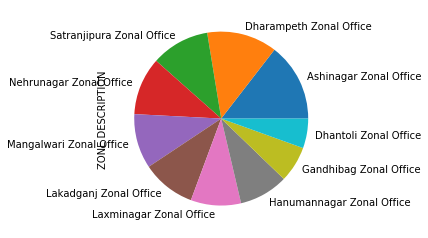

In [205]:
complaints2019['ZONE DESCRIPTION'].value_counts().plot(kind='pie')
complaints2019['ZONE DESCRIPTION'].value_counts()

**Complaint types per zone**

Complaint Category         CAPEX COMPLAINTS  COMMERCIAL COMPLAINTS  \
ZONE DESCRIPTION                                                     
Ashinagar Zonal Office                   17                    683   
Dhantoli Zonal Office                    51                    275   
Dharampeth Zonal Office                  52                    521   
Gandhibag Zonal Office                   24                    215   
Hanumannagar Zonal Office                72                    455   
Lakadganj Zonal Office                   25                    490   
Laxminagar Zonal Office                 169                    387   
Mangalwari Zonal Office                  19                    256   
Nehrunagar Zonal Office                  13                    512   
Satranjipura Zonal Office                57                    288   

Complaint Category         TECHNICAL COMPLAINTS  
ZONE DESCRIPTION                                 
Ashinagar Zonal Office                     2649  
Dhantoli 

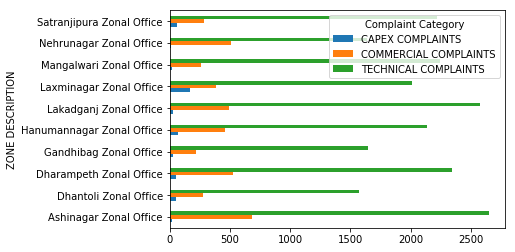

In [209]:
complaints2017Grp3a = complaints2017.groupby(['ZONE DESCRIPTION', 'Complaint Category']).size().unstack().fillna(0)
print (complaints2017Grp3a)
complaints2017Grp3a.plot(kind='barh')

Complaint Category         CAPEX COMPLAINTS  COMMERCIAL COMPLAINTS  \
ZONE DESCRIPTION                                                     
0                                       0.0                    0.0   
Ashinagar Zonal Office                 29.0                 1031.0   
Dhantoli Zonal Office                  95.0                  516.0   
Dharampeth Zonal Office                82.0                 1124.0   
Gandhibag Zonal Office                 48.0                  660.0   
Hanumannagar Zonal Office             159.0                  790.0   
Lakadganj Zonal Office                 33.0                  828.0   
Laxminagar Zonal Office                99.0                  818.0   
Mangalwari Zonal Office                40.0                  613.0   
Nehrunagar Zonal Office                27.0                 1478.0   
Satranjipura Zonal Office             104.0                  550.0   

Complaint Category         TECHNICAL COMPLAINTS  
ZONE DESCRIPTION                       

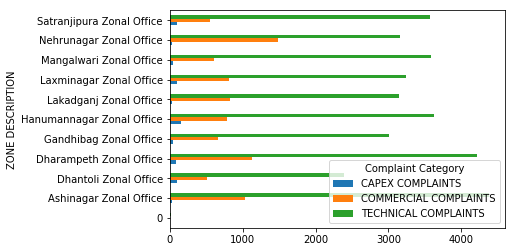

In [210]:
complaints2017Grp3b = complaints2018.groupby(['ZONE DESCRIPTION', 'Complaint Category']).size().unstack().fillna(0)
print (complaints2017Grp3b)
complaints2017Grp3b.plot(kind='barh')

**Nehrunagar has significantly high commercial complaints**

Complaint Category         CAPEX COMPLAINTS  COMMERCIAL COMPLAINTS  \
ZONE DESCRIPTION                                                     
Ashinagar Zonal Office                   10                    475   
Dhantoli Zonal Office                    21                    230   
Dharampeth Zonal Office                  47                    547   
Gandhibag Zonal Office                   14                    322   
Hanumannagar Zonal Office                65                    254   
Lakadganj Zonal Office                   12                    387   
Laxminagar Zonal Office                  52                    292   
Mangalwari Zonal Office                  22                    324   
Nehrunagar Zonal Office                  12                    618   
Satranjipura Zonal Office                27                    274   

Complaint Category         TECHNICAL COMPLAINTS  
ZONE DESCRIPTION                                 
Ashinagar Zonal Office                     2511  
Dhantoli 

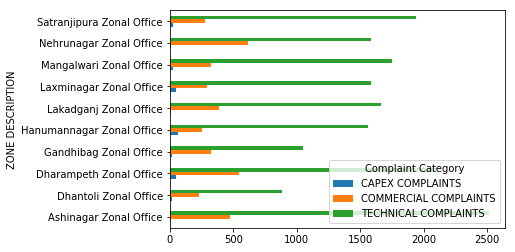

In [215]:
complaints2017Grp3c = complaints2019.groupby(['ZONE DESCRIPTION', 'Complaint Category']).size().unstack().fillna(0)
print (complaints2017Grp3c)
complaints2017Grp3c.plot(kind='barh')



Complaint Type             ACCESSORIES DAMAGED  AIR IN THE PIPE  \
ZONE DESCRIPTION                                                  
Ashinagar Zonal Office                   182.0              5.0   
Dhantoli Zonal Office                     19.0              4.0   
Dharampeth Zonal Office                   64.0              4.0   
Gandhibag Zonal Office                    26.0              3.0   
Hanumannagar Zonal Office                 60.0             11.0   

Complaint Type             BILL NOT RECEIVED  BOOSTER PUMP  BURSTS  \
ZONE DESCRIPTION                                                     
Ashinagar Zonal Office                  90.0          19.0     1.0   
Dhantoli Zonal Office                   34.0          14.0     0.0   
Dharampeth Zonal Office                 97.0          13.0     0.0   
Gandhibag Zonal Office                  64.0           8.0     0.0   
Hanumannagar Zonal Office               31.0          12.0     0.0   

Complaint Type             COMPLAINT RE

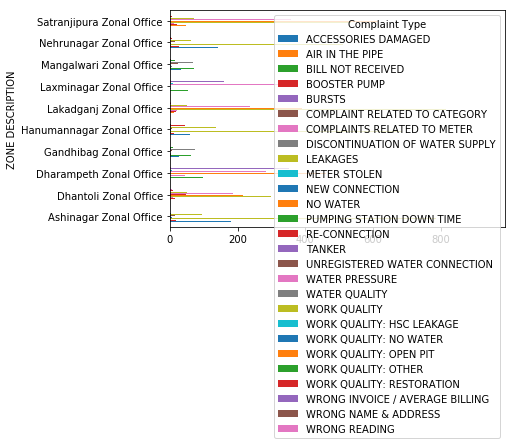

In [244]:
complaints2017Grp4c = complaints2019.groupby(['ZONE DESCRIPTION', 'Complaint Type']).size().unstack().fillna(0)
print (complaints2017Grp4c.head(5))
complaints2017Grp4c.plot(kind='barh')

**The top 3 complaints per zone are**

**Day vs Complaint Type**

In [23]:
from datetime import datetime
def convDt(stringDate):
    format = '%d-%m-%Y'
#     wkday = datetime.strftime(datetime.strptime(stringDate, format), format)
    wkday = datetime.strptime(stringDate, format).weekday()
    return wkday

def convDt1(stringDate):
    format = '%d.%m.%Y'
#     wkday = datetime.strftime(datetime.strptime(stringDate, format), format)
    wkday = datetime.strptime(stringDate, format).weekday()
    return wkday

In [246]:
print (complaints2017['Complaint Date'][0])
print (convDt(complaints2017['Complaint Date'][0]))

17-05-2017
2


In [243]:
complaints2017['wkday'] = complaints2017.apply(lambda L: convDt(L['Complaint Date']), axis=1)
complaints2018['wkday'] = complaints2018.apply(lambda L: convDt1(L['Complaint Date']), axis=1)
complaints2019['wkday'] = complaints2019.apply(lambda L: convDt(L['Complaint Date']), axis=1)

0        2
1        4
2        4
3        4
4        4
5        4
6        4
7        4
8        4
9        4
10       4
11       4
12       4
13       4
14       4
15       4
16       4
17       4
18       4
19       4
20       4
21       4
22       4
23       4
24       4
25       4
26       4
27       4
28       4
29       4
        ..
25602    6
25603    6
25604    6
25605    6
25606    6
25607    6
25608    6
25609    6
25610    6
25611    6
25612    6
25613    6
25614    6
25615    6
25616    6
25617    6
25618    6
25619    6
25620    6
25621    6
25622    6
25623    6
25624    5
25625    4
25626    2
25627    3
25628    3
25629    1
25630    3
25631    2
Name: wkday, Length: 25632, dtype: int64

Complaint Category  CAPEX COMPLAINTS  COMMERCIAL COMPLAINTS  \
wkday                                                         
0                                 63                    636   
1                                 93                    609   
2                                 85                    704   
3                                 85                    712   
4                                 88                    689   
5                                 66                    586   
6                                 19                    146   

Complaint Category  TECHNICAL COMPLAINTS  
wkday                                     
0                                   3342  
1                                   3370  
2                                   3377  
3                                   3631  
4                                   3418  
5                                   2882  
6                                   1030  
Complaint Type  ACCESSORIES DAMAGED  AIR IN T

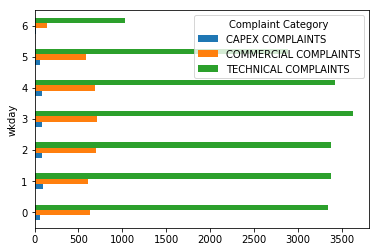

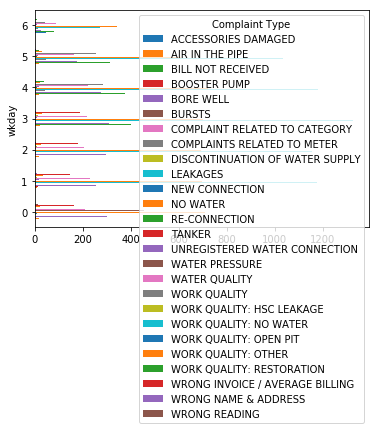

In [248]:
complaints2017Grp5a = complaints2017.groupby(['wkday', 'Complaint Category']).size().unstack().fillna(0)
print (complaints2017Grp5a)
complaints2017Grp5a.plot(kind='barh')


complaints2017Grp6a = complaints2017.groupby(['wkday', 'Complaint Type']).size().unstack().fillna(0)
print (complaints2017Grp6a)
complaints2017Grp6a.plot(kind='barh')



**Sunday receives very few complaints. Apart from that the complaints are evenly distributed through the week**

ZONE DESCRIPTION  Ashinagar Zonal Office  Dhantoli Zonal Office  \
wkday                                                             
0                                    544                    178   
1                                    513                    154   
2                                    441                    197   
3                                    476                    184   
4                                    466                    221   
5                                    404                    163   
6                                    152                     38   

ZONE DESCRIPTION  Dharampeth Zonal Office  Gandhibag Zonal Office  \
wkday                                                               
0                                     464                     218   
1                                     462                     219   
2                                     451                     242   
3                                     408          

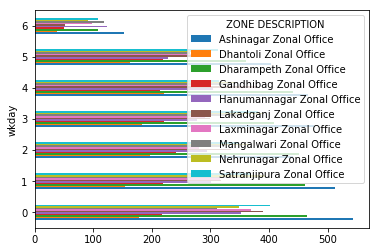

In [249]:
complaints2017Grp6b = complaints2019.groupby(['wkday', 'ZONE DESCRIPTION']).size().unstack().fillna(0)
print (complaints2017Grp6b)
complaints2017Grp6b.plot(kind='barh')

**Zones are complaining less on Saturday and Sunday**

**Difference in response times by zone**

ZONE DESCRIPTION
Ashinagar Zonal Office       0.736044
Dhantoli Zonal Office        0.417143
Dharampeth Zonal Office      0.641538
Gandhibag Zonal Office       0.414505
Hanumannagar Zonal Office    0.585495
Lakadganj Zonal Office       0.678681
Laxminagar Zonal Office      0.564615
Mangalwari Zonal Office      0.553407
Nehrunagar Zonal Office      0.475385
Satranjipura Zonal Office    0.563077
dtype: float64


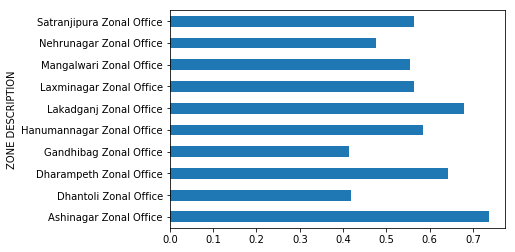

In [255]:
complaints2017Grp7a = complaints2017.groupby(['ZONE DESCRIPTION','Days taken to resolve the problem']).size().unstack().fillna(0)
print (complaints2017Grp7a.mean(axis=1))
complaints2017Grp7a.mean(axis=1).plot(kind='barh')

ZONE DESCRIPTION
0                            0.002604
Ashinagar Zonal Office       1.415625
Dhantoli Zonal Office        0.780208
Dharampeth Zonal Office      1.413542
Gandhibag Zonal Office       0.967969
Hanumannagar Zonal Office    1.193229
Lakadganj Zonal Office       1.041667
Laxminagar Zonal Office      1.083333
Mangalwari Zonal Office      1.102344
Nehrunagar Zonal Office      1.216146
Satranjipura Zonal Office    1.100260
dtype: float64


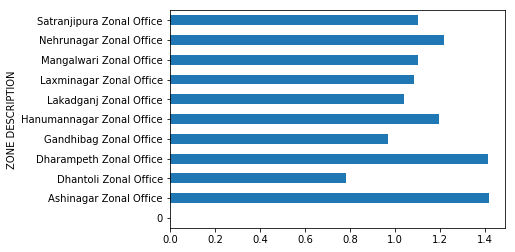

In [256]:
complaints2017Grp7b = complaints2018.groupby(['ZONE DESCRIPTION','Days taken to resolve the problem']).size().unstack().fillna(0)
print (complaints2017Grp7b.mean(axis=1))
complaints2017Grp7b.mean(axis=1).plot(kind='barh')

ZONE DESCRIPTION
Ashinagar Zonal Office       1.124203
Dhantoli Zonal Office        0.425891
Dharampeth Zonal Office      1.011257
Gandhibag Zonal Office       0.518949
Hanumannagar Zonal Office    0.705816
Lakadganj Zonal Office       0.773734
Laxminagar Zonal Office      0.722702
Mangalwari Zonal Office      0.786116
Nehrunagar Zonal Office      0.831895
Satranjipura Zonal Office    0.840150
dtype: float64


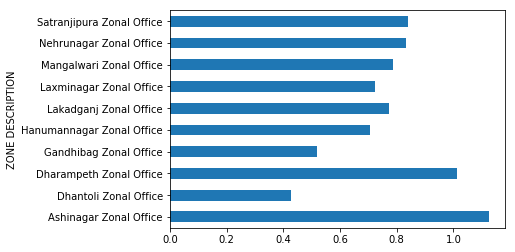

In [257]:
complaints2017Grp7c = complaints2019.groupby(['ZONE DESCRIPTION','Days taken to resolve the problem']).size().unstack().fillna(0)
print (complaints2017Grp7c.mean(axis=1))
complaints2017Grp7c.mean(axis=1).plot(kind='barh')

**Its evident that time taken to service / resolve complaints for Ashinagar and Dharampeth are significantly high which is what might be causing the spike in high number of complaints**

In [6]:
from datetime import datetime
def convMonth(stringDate):
    format = '%d-%m-%Y'
#     wkday = datetime.strftime(datetime.strptime(stringDate, format), format)
    wkday = datetime.strptime(stringDate, format).month
    return wkday

def convMonth1(stringDate):
    format = '%d.%m.%Y'
#     wkday = datetime.strftime(datetime.strptime(stringDate, format), format)
    wkday = datetime.strptime(stringDate, format).month
    return wkday

def convYear(stringDate):
    format = '%d-%m-%Y'
#     wkday = datetime.strftime(datetime.strptime(stringDate, format), format)
    wkday = datetime.strptime(stringDate, format).year
    return wkday

In [7]:
complaints2017['month'] = complaints2017.apply(lambda L: convMonth(L['Complaint Date']), axis=1)
complaints2018['month'] = complaints2018.apply(lambda L: convMonth(L['Complaint Date']), axis=1)
complaints2019['month'] = complaints2019.apply(lambda L: convMonth(L['Complaint Date']), axis=1)
allcomplaints['month'] = allcomplaints.apply(lambda L: convMonth(L['Complaint Date']), axis=1)

complaints2017['year'] = complaints2017.apply(lambda L: convYear(L['Complaint Date']), axis=1)
complaints2018['year'] = complaints2018.apply(lambda L: convYear(L['Complaint Date']), axis=1)
complaints2019['year'] = complaints2019.apply(lambda L: convYear(L['Complaint Date']), axis=1)
allcomplaints['year'] = allcomplaints.apply(lambda L: convYear(L['Complaint Date']), axis=1)

In [8]:
complaints2017['year']

0        2017
1        2017
2        2017
3        2017
4        2017
5        2017
6        2017
7        2017
8        2017
9        2017
10       2017
11       2017
12       2017
13       2017
14       2017
15       2017
16       2017
17       2017
18       2017
19       2017
20       2017
21       2017
22       2017
23       2017
24       2017
25       2017
26       2017
27       2017
28       2017
29       2017
         ... 
25602    2017
25603    2017
25604    2017
25605    2017
25606    2017
25607    2017
25608    2017
25609    2017
25610    2017
25611    2017
25612    2017
25613    2017
25614    2017
25615    2017
25616    2017
25617    2017
25618    2017
25619    2017
25620    2017
25621    2017
25622    2017
25623    2017
25624    2017
25625    2017
25626    2017
25627    2017
25628    2017
25629    2017
25630    2017
25631    2017
Name: year, Length: 25632, dtype: int64

# Trending data analysis

In [9]:
count2017 = complaints2017.groupby(['Complaint Date']).size()
count2018 = complaints2018.groupby(['Complaint Date']).size() 
count2019 = complaints2019.groupby(['Complaint Date']).size() 
allcount = allcomplaints.groupby(['Complaint Date']).size()

In [10]:
uniqueDates2017 = complaints2017['Complaint Date'].unique()
uniqueDates2018 = complaints2018['Complaint Date'].unique()
uniqueDates2019 = complaints2019['Complaint Date'].unique()
alluniqueDates = allcomplaints['Complaint Date'].unique()

In [11]:
freq2017 = []
dates2017 = []
for curDate in uniqueDates2017:
    freq2017.append(count2017[curDate])
    dates2017.append(curDate)


freq2018 = []
dates2018 = []
for curDate in uniqueDates2018:
    freq2018.append(count2018[curDate])
    dates2018.append(curDate)
    

freq2019 = []
dates2019 = []
for curDate in uniqueDates2019:
    freq2019.append(count2019[curDate])
    dates2019.append(curDate)
    
    
allfreq = []
alldates = []
for curDate in alluniqueDates:
    allfreq.append(allcount[curDate])
    alldates.append(curDate)

In [12]:
finAggDf2017 = pd.DataFrame([dates2017, freq2017])
finAggDfT2017 = finAggDf2017.T
finAggDfT2017.columns = ['dates', 'freq']

finAggDf2018 = pd.DataFrame([dates2018, freq2018])
finAggDfT2018 = finAggDf2018.T
finAggDfT2018.columns = ['dates', 'freq']

finAggDf2019 = pd.DataFrame([dates2019, freq2019])
finAggDfT2019 = finAggDf2019.T
finAggDfT2019.columns = ['dates', 'freq']

allfinAggDf = pd.DataFrame([alldates, allfreq])
allfinAggDfT = allfinAggDf.T
allfinAggDfT.columns = ['dates', 'freq']

In [14]:
finAggDfT2017['dates'] = pd.to_datetime(finAggDfT2017['dates'], format='%d-%m-%Y')
finAggDfT2018['dates'] = pd.to_datetime(finAggDfT2018['dates'], format='%d-%m-%Y')
finAggDfT2019['dates'] = pd.to_datetime(finAggDfT2019['dates'], format='%d-%m-%Y')
allfinAggDfT['dates'] = pd.to_datetime(allfinAggDfT['dates'], format='%d-%m-%Y')
allfinAggDfT

,dates,freq
0,2017-05-17,1
1,2017-05-19,63
2,2017-05-20,61
3,2017-05-22,103
4,2017-05-21,39
5,2017-05-23,87
6,2017-05-24,128
7,2017-05-25,111
8,2017-05-26,106
9,2017-05-27,92


In [16]:
finAggDfT2017 = finAggDfT2017.set_index('dates')
finAggDfT2018 = finAggDfT2018.set_index('dates')
finAggDfT2019 = finAggDfT2019.set_index('dates')
allfinAggDfT = allfinAggDfT.set_index('dates')

In [13]:
finAggDfT2017.index
finAggDfT2018.index
finAggDfT2019.index
allfinAggDfT.index

DatetimeIndex(['2017-05-17', '2017-05-19', '2017-05-20', '2017-05-22',
               '2017-05-21', '2017-05-23', '2017-05-24', '2017-05-25',
               '2017-05-26', '2017-05-27',
               ...
               '2019-06-21', '2019-06-22', '2019-06-23', '2019-06-24',
               '2019-06-25', '2019-06-26', '2019-06-27', '2019-06-28',
               '2019-06-29', '2019-06-30'],
              dtype='datetime64[ns]', name='dates', length=774, freq=None)

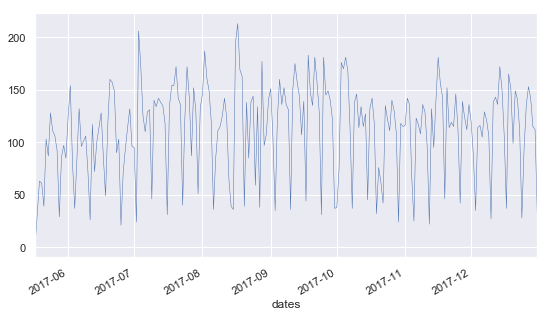

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Use seaborn style defaults and set the default figure size
sns.set(rc={'figure.figsize':(9, 5)})
finAggDfT2017['freq'].plot(linewidth=0.5)

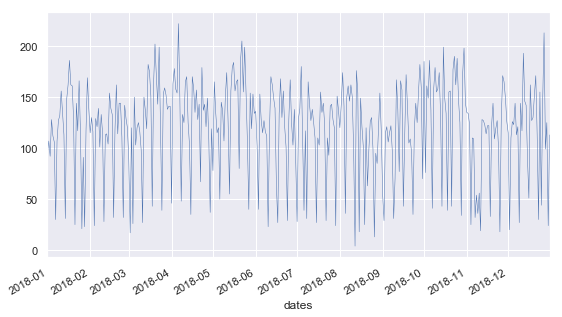

In [15]:
finAggDfT2018['freq'].plot(linewidth=0.5)

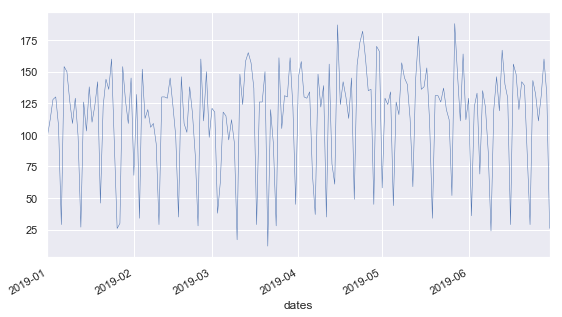

In [16]:
finAggDfT2019['freq'].plot(linewidth=0.5)

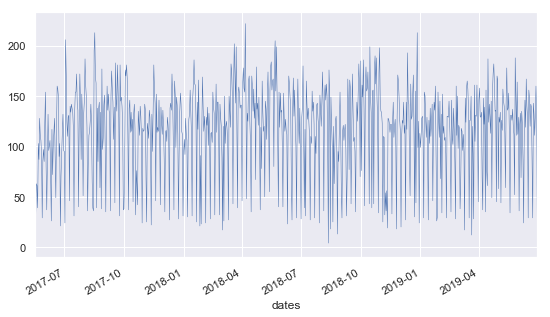

In [17]:
allfinAggDfT['freq'].plot(linewidth=0.5)

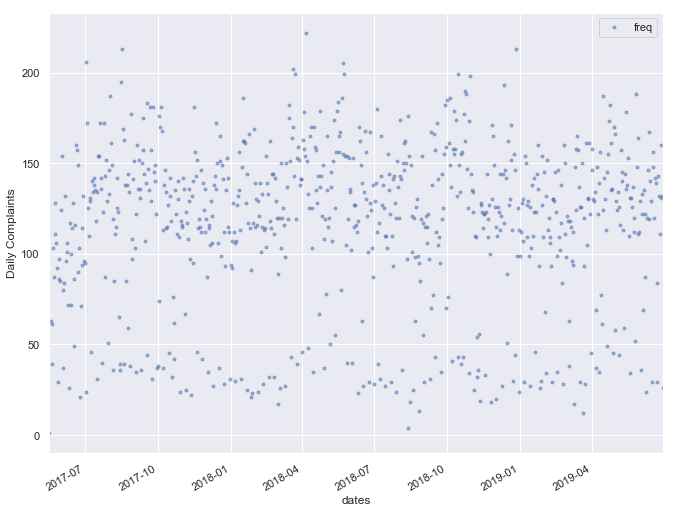

In [18]:
cols_plot = ['freq']
axes = allfinAggDfT[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Complaints')

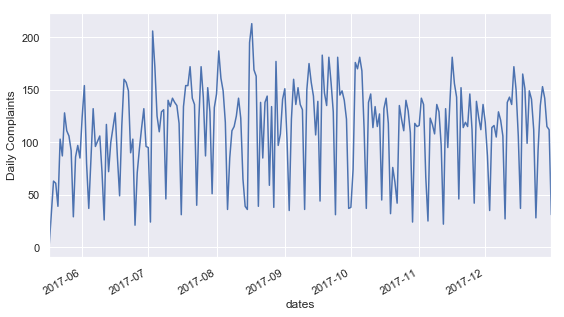

In [19]:
ax = allfinAggDfT.loc['2017', 'freq'].plot()
ax.set_ylabel('Daily Complaints');

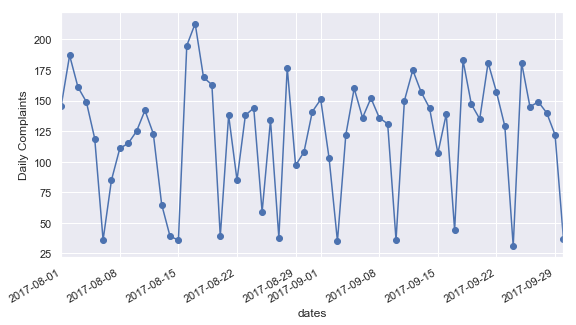

In [20]:
ax = allfinAggDfT.loc['2017-08':'2017-09', 'freq'].plot(marker='o', linestyle='-')
ax.set_ylabel('Daily Complaints');

**Day of the week analysis of complaints (Average)**

Complaint Category  CAPEX COMPLAINTS  COMMERCIAL COMPLAINTS  \
wkday                                                         
0                                249                   2773   
1                                262                   2786   
2                                233                   2789   
3                                229                   2937   
4                                257                   2641   
5                                219                   1911   
6                                 48                    376   

Complaint Category  TECHNICAL COMPLAINTS  
wkday                                     
0                                  11954  
1                                  11655  
2                                  11461  
3                                  11684  
4                                  11552  
5                                  10220  
6                                   3480  


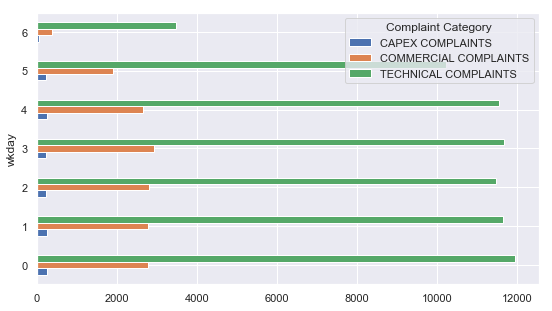

In [24]:
allcomplaints['wkday'] = allcomplaints.apply(lambda L: convDt(L['Complaint Date']), axis=1)

allcomplaintsGrp5a = allcomplaints.groupby(['wkday', 'Complaint Category']).size().unstack().fillna(0)
print (allcomplaintsGrp5a)
allcomplaintsGrp5a.plot(kind='barh')

**As mentioned above weekends are receiving lower level of complaints**

# Seasonality

# Resampling to find data for month and year

In [17]:
allfinAggDfT['freq'] = pd.to_numeric(allfinAggDfT['freq'])
data_columns = ['freq']
# Resample to weekly frequency, aggregating with mean
allfinAggDfT_weekly_mean = allfinAggDfT[data_columns].resample('W').mean()
allfinAggDfT_weekly_mean.head(3)
allfinAggDfT_monthly = allfinAggDfT[data_columns].resample('M').mean()
allfinAggDfT_monthly.head(3)

,freq
dates,
2017-05-31,77.714286
2017-06-30,99.366667
2017-07-31,122.516129


In [18]:
allfinAggDfT['freq']

dates
2017-05-17      1
2017-05-19     63
2017-05-20     61
2017-05-22    103
2017-05-21     39
2017-05-23     87
2017-05-24    128
2017-05-25    111
2017-05-26    106
2017-05-27     92
2017-05-28     29
2017-05-29     86
2017-05-30     97
2017-05-31     85
2017-06-01    124
2017-06-02    154
2017-06-03     80
2017-06-04     37
2017-06-05     84
2017-06-06    132
2017-06-07     96
2017-06-08    101
2017-06-09    106
2017-06-10     72
2017-06-12    117
2017-06-11     26
2017-06-13     72
2017-06-14    100
2017-06-15    114
2017-06-16    128
             ... 
2019-06-01    129
2019-06-02     36
2019-06-03    122
2019-06-04    133
2019-06-05     69
2019-06-06    135
2019-06-07    122
2019-06-08     87
2019-06-10    120
2019-06-09     24
2019-06-11    146
2019-06-12    119
2019-06-13    167
2019-06-14    140
2019-06-15    129
2019-06-16     29
2019-06-17    156
2019-06-18    148
2019-06-19    120
2019-06-20    142
2019-06-21    139
2019-06-22     84
2019-06-23     29
2019-06-24    143
2019

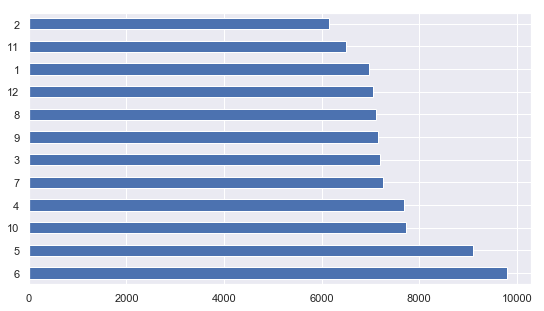

In [31]:
allcomplaints['month'].value_counts().plot(kind='barh')

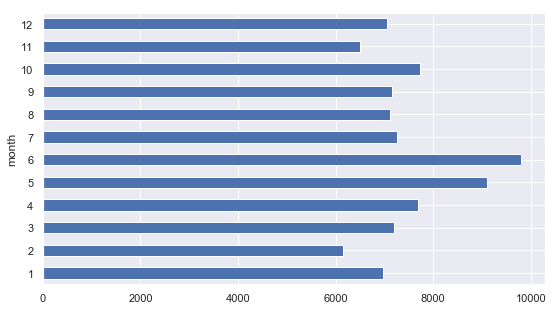

In [32]:
allcomplaintsGrp1 = allcomplaints.groupby(['month']).size()
allcomplaintsGrp1.plot(kind='barh')

**Its clear that May and June months are receiving majority of the complaints as they are incredibly hot months**

In [33]:
allcomplaintsGrp21 = allcomplaints.groupby(['Complaint Type', 'month']).size().unstack().fillna(0)
allcomplaintsGrp21

month,1,2,3,4,5,6,7,8,9,10,11,12
Complaint Type,,,,,,,,,,,,
ACCESSORIES DAMAGED,317.0,268.0,308.0,303.0,336.0,484.0,405.0,485.0,474.0,428.0,364.0,323.0
AIR IN THE PIPE,27.0,26.0,40.0,27.0,66.0,52.0,23.0,24.0,26.0,45.0,25.0,24.0
BILL NOT RECEIVED,349.0,378.0,420.0,351.0,344.0,558.0,619.0,562.0,645.0,662.0,488.0,418.0
BOOSTER PUMP,10.0,5.0,11.0,51.0,127.0,70.0,8.0,7.0,9.0,13.0,9.0,8.0
BORE WELL,0.0,0.0,0.0,0.0,83.0,348.0,464.0,330.0,331.0,86.0,0.0,0.0
BURSTS,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
COMPLAINT RELATED TO CATEGORY,10.0,25.0,19.0,18.0,20.0,20.0,13.0,13.0,16.0,10.0,17.0,21.0
COMPLAINTS RELATED TO METER,73.0,71.0,98.0,101.0,114.0,94.0,78.0,83.0,86.0,101.0,76.0,75.0
DISCONTINUATION OF WATER SUPPLY,8.0,6.0,14.0,14.0,17.0,8.0,12.0,5.0,10.0,8.0,12.0,11.0


**The top 3 complaint types for each month are as follows**

In [19]:
y = allfinAggDfT['freq'].resample('MS').mean()

In [20]:
y['2017':]

dates
2017-05-01     77.714286
2017-06-01     99.366667
2017-07-01    122.516129
2017-08-01    118.612903
2017-09-01    127.166667
2017-10-01    109.161290
2017-11-01    114.066667
2017-12-01    111.838710
2018-01-01    114.290323
2018-02-01    112.714286
2018-03-01    124.774194
2018-04-01    130.933333
2018-05-01    137.032258
2018-06-01    115.500000
2018-07-01    111.451613
2018-08-01    111.193548
2018-09-01    111.066667
2018-10-01    140.225806
2018-11-01    102.766667
2018-12-01    115.645161
2019-01-01    110.806452
2019-02-01    106.785714
2019-03-01    107.096774
2019-04-01    125.133333
2019-05-01    121.612903
2019-06-01    112.000000
Freq: MS, Name: freq, dtype: float64

**October of 2018 also received abnormally large number of complaints**

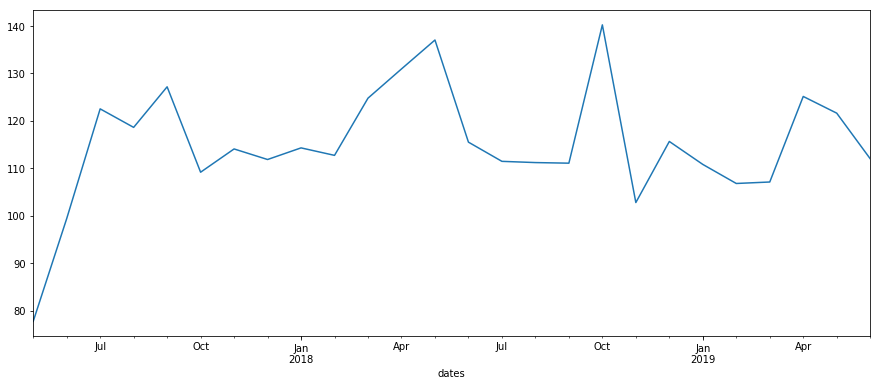

In [21]:
import matplotlib.pyplot as plt
y.plot(figsize=(15, 6))
# y['freq'].plot()
plt.show()

** Dividing into seasonality, trend and noise**

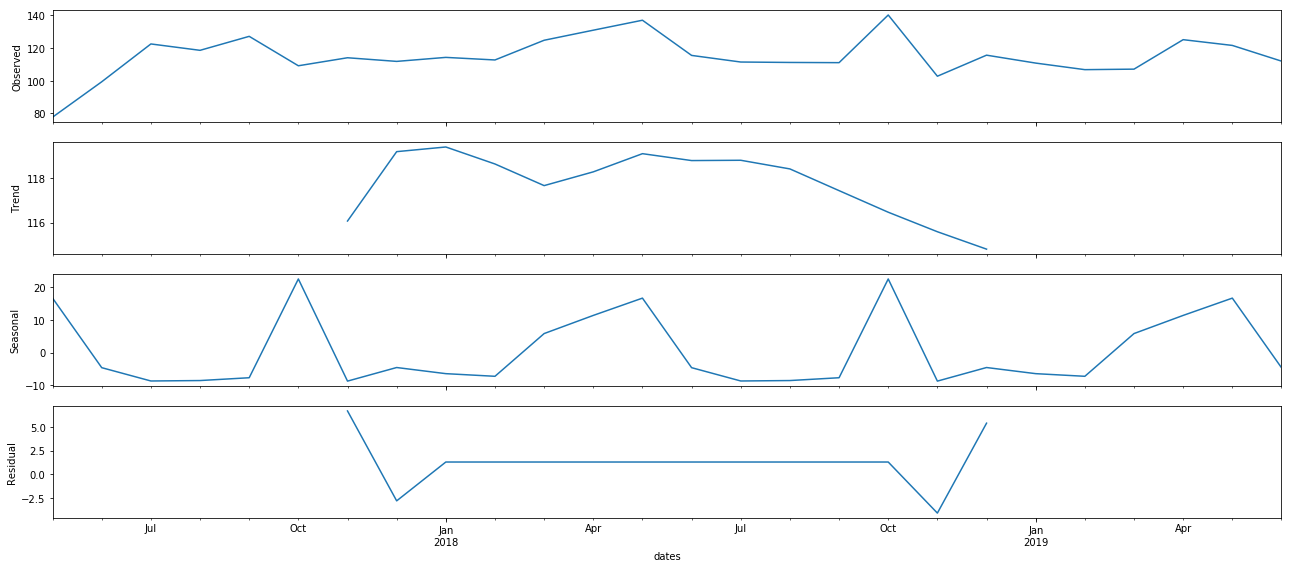

In [22]:
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

**From the seasonality chart October & April May experience high number of complaints**

# Applying ARIMA - Autoregressive Integrated Moving Average

In [140]:
import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [143]:
# warnings.filterwarnings("ignore") # specify to ignore warning messages
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:311.04056962079244
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:106.98512819749345
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:128.44324609702568
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:6.6842369663574495
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:274.1652801554683
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:99.85989490661066
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:130.30670442028068
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:7.945031080126339
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:196.12059312127747
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:109.90570600397027
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:111.18662912760139
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:-17.166128699835017
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:176.18210738120948
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:96.94950986479739
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:105.90201902075479


c:\users\charles david\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:-6.802998752752254
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:207.61908212012764
ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:108.80808644789498
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:109.36159294626255


c:\users\charles david\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
c:\users\charles david\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:-1.2711770136670202
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:188.02335311170341
ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:101.91743867683961
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:108.53089882171975
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:87.04294976295107
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:195.67423230171937
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:110.0610535362643
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:102.05839590090392
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:6.0
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:177.72808751890187
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:96.9304956991904
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:98.94022711766053
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:8.0


In [148]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 0),
                                seasonal_order=(1, 1, 0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.2760   7.61e-18  -3.63e+16      0.000      -0.276      -0.276
sigma2          1e-10   1.98e-09      0.050      0.960   -3.79e-09    3.99e-09


c:\users\charles david\appdata\local\programs\python\python36\lib\site-packages\statsmodels\base\model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ValueError: `dataset` input should have multiple elements.

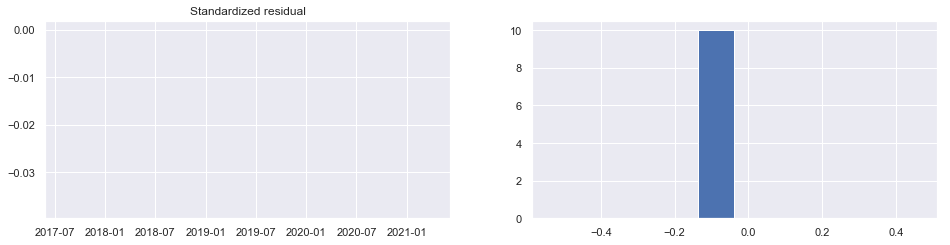

In [147]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

**Using prophet**

In [52]:
allfreq

[1,
 63,
 61,
 103,
 39,
 87,
 128,
 111,
 106,
 92,
 29,
 86,
 97,
 85,
 124,
 154,
 80,
 37,
 84,
 132,
 96,
 101,
 106,
 72,
 117,
 26,
 72,
 100,
 114,
 128,
 86,
 49,
 116,
 160,
 157,
 149,
 90,
 103,
 71,
 21,
 94,
 114,
 132,
 96,
 95,
 206,
 24,
 172,
 125,
 110,
 129,
 131,
 46,
 140,
 134,
 142,
 138,
 135,
 118,
 31,
 134,
 154,
 154,
 172,
 142,
 136,
 40,
 123,
 172,
 143,
 87,
 152,
 129,
 51,
 133,
 146,
 187,
 161,
 149,
 119,
 36,
 85,
 111,
 115,
 125,
 142,
 123,
 65,
 39,
 36,
 195,
 213,
 169,
 163,
 39,
 138,
 85,
 138,
 144,
 59,
 134,
 38,
 177,
 97,
 108,
 141,
 151,
 103,
 35,
 122,
 160,
 136,
 152,
 136,
 131,
 150,
 36,
 175,
 157,
 144,
 107,
 139,
 44,
 183,
 147,
 135,
 181,
 157,
 129,
 31,
 181,
 145,
 149,
 140,
 122,
 37,
 176,
 38,
 74,
 170,
 181,
 168,
 113,
 37,
 138,
 146,
 114,
 134,
 115,
 127,
 45,
 132,
 142,
 118,
 76,
 32,
 62,
 42,
 135,
 122,
 111,
 140,
 130,
 109,
 24,
 118,
 115,
 116,
 142,
 136,
 67,
 123,
 25,
 117,
 108,
 136,
 1

In [28]:
import matplotlib.pyplot
from fbprophet import Prophet
newallfinAggDf = pd.DataFrame([alldates, allfreq])
newallfinAggDf = newallfinAggDf.T
newallfinAggDf.columns = ['dates', 'freq']

newallfinAggDf['dates'] = pd.to_datetime(newallfinAggDf['dates'], format='%d-%m-%Y')
newallfinAggDf
newallfinAggDf = newallfinAggDf.rename(columns={'dates': 'ds', 'freq': 'y'})
newallfinAggDf

,ds,y
0,2017-05-17,1
1,2017-05-19,63
2,2017-05-20,61
3,2017-05-22,103
4,2017-05-21,39
5,2017-05-23,87
6,2017-05-24,128
7,2017-05-25,111
8,2017-05-26,106
9,2017-05-27,92


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


<Figure size 1296x432 with 0 Axes>

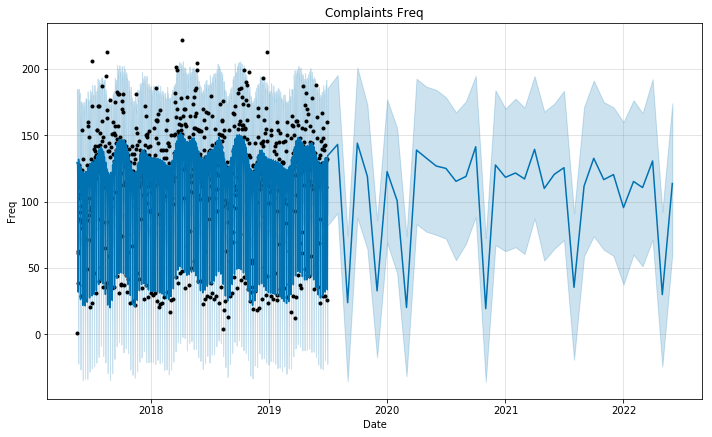

In [53]:
from fbprophet import Prophet
furniture_model = Prophet(interval_width=0.95)
furniture_model.fit(newallfinAggDf)
furniture_forecast = furniture_model.make_future_dataframe(periods=36, freq='MS')
furniture_forecast = furniture_model.predict(furniture_forecast)
plt.figure(figsize=(18, 6))
furniture_model.plot(furniture_forecast, xlabel = 'Date', ylabel = 'Freq')
plt.title('Complaints Freq');

In [54]:
furniture_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-05-17,107.458251,74.629611,184.678981,107.458251,107.458251,22.105915,22.105915,22.105915,14.490910,14.490910,14.490910,7.615005,7.615005,7.615005,0.0,0.0,0.0,129.564166
1,2017-05-19,107.564832,75.509958,184.959402,107.564832,107.564832,20.638026,20.638026,20.638026,14.197773,14.197773,14.197773,6.440253,6.440253,6.440253,0.0,0.0,0.0,128.202858
2,2017-05-20,107.618123,56.036542,163.074194,107.618123,107.618123,1.031375,1.031375,1.031375,-4.720103,-4.720103,-4.720103,5.751478,5.751478,5.751478,0.0,0.0,0.0,108.649498
3,2017-05-21,107.671413,-22.063726,89.067938,107.671413,107.671413,-75.787977,-75.787977,-75.787977,-80.792435,-80.792435,-80.792435,5.004457,5.004457,5.004457,0.0,0.0,0.0,31.883436
4,2017-05-22,107.724704,76.589095,184.208231,107.724704,107.724704,24.359277,24.359277,24.359277,20.151519,20.151519,20.151519,4.207758,4.207758,4.207758,0.0,0.0,0.0,132.083980
5,2017-05-23,107.777994,71.085538,185.188972,107.777994,107.777994,21.040622,21.040622,21.040622,17.669611,17.669611,17.669611,3.371011,3.371011,3.371011,0.0,0.0,0.0,128.818616
6,2017-05-24,107.831285,66.749719,178.558170,107.831285,107.831285,16.995647,16.995647,16.995647,14.490910,14.490910,14.490910,2.504737,2.504737,2.504737,0.0,0.0,0.0,124.826932
7,2017-05-25,107.884575,74.512773,182.223923,107.884575,107.884575,20.622867,20.622867,20.622867,19.002725,19.002725,19.002725,1.620142,1.620142,1.620142,0.0,0.0,0.0,128.507442
8,2017-05-26,107.937866,69.660561,173.678097,107.937866,107.937866,14.926679,14.926679,14.926679,14.197773,14.197773,14.197773,0.728906,0.728906,0.728906,0.0,0.0,0.0,122.864545
9,2017-05-27,107.991156,49.949240,157.340569,107.991156,107.991156,-4.877151,-4.877151,-4.877151,-4.720103,-4.720103,-4.720103,-0.157047,-0.157047,-0.157047,0.0,0.0,0.0,103.114006


In [55]:
furniture_forecast.tail(24)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
786,2020-07-01,110.731027,72.217366,178.821546,105.716831,115.696191,14.414478,14.414478,14.414478,14.490910,14.490910,14.490910,-0.076432,-0.076432,-0.076432,0.0,0.0,0.0,125.145506
787,2020-08-01,110.397145,55.874199,167.367689,104.734791,115.979919,5.020224,5.020224,5.020224,-4.720103,-4.720103,-4.720103,9.740327,9.740327,9.740327,0.0,0.0,0.0,115.417369
788,2020-09-01,110.063262,68.394233,175.772446,103.797266,116.340746,9.052191,9.052191,9.052191,17.669611,17.669611,17.669611,-8.617420,-8.617420,-8.617420,0.0,0.0,0.0,119.115453
789,2020-10-01,109.740150,88.603871,194.961848,102.900846,116.677242,31.766557,31.766557,31.766557,19.002725,19.002725,19.002725,12.763832,12.763832,12.763832,0.0,0.0,0.0,141.506707
790,2020-11-01,109.406267,-35.708180,72.560168,101.983637,117.084125,-89.992564,-89.992564,-89.992564,-80.792435,-80.792435,-80.792435,-9.200130,-9.200130,-9.200130,0.0,0.0,0.0,19.413703
791,2020-12-01,109.083155,67.363509,184.108097,100.987530,117.475998,18.662148,18.662148,18.662148,17.669611,17.669611,17.669611,0.992537,0.992537,0.992537,0.0,0.0,0.0,127.745303
792,2021-01-01,108.749273,62.764700,170.225305,99.971959,117.851963,9.702349,9.702349,9.702349,14.197773,14.197773,14.197773,-4.495424,-4.495424,-4.495424,0.0,0.0,0.0,118.451622
793,2021-02-01,108.415390,65.772563,177.778625,98.757856,118.142906,13.280340,13.280340,13.280340,20.151519,20.151519,20.151519,-6.871179,-6.871179,-6.871179,0.0,0.0,0.0,121.695730
794,2021-03-01,108.113819,60.565450,170.946823,97.698320,118.396404,9.097932,9.097932,9.097932,20.151519,20.151519,20.151519,-11.053587,-11.053587,-11.053587,0.0,0.0,0.0,117.211750
795,2021-04-01,107.779936,87.549241,194.710974,96.478095,118.935903,31.748132,31.748132,31.748132,19.002725,19.002725,19.002725,12.745407,12.745407,12.745407,0.0,0.0,0.0,139.528068


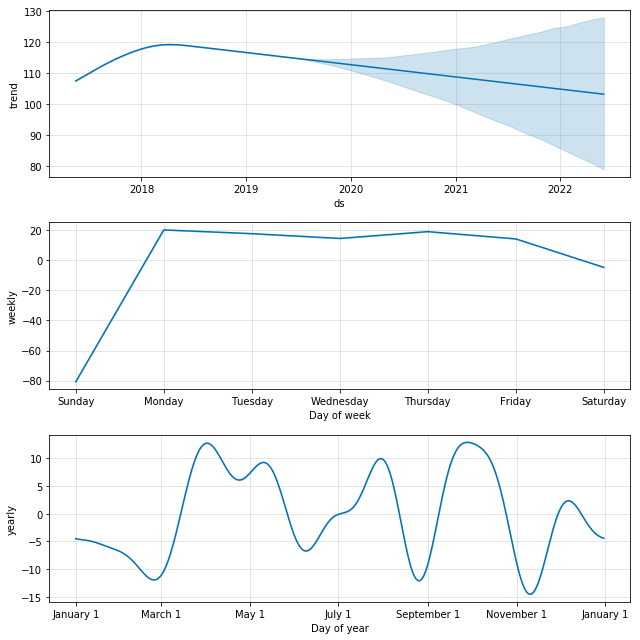

In [56]:
furniture_model.plot_components(furniture_forecast);

**Few insights from the prediction model used**

**1. We have predicted the number of complaints each day till 1 June 2022**

**2. The trend is that the number of complaints is going down and goes till 103 complaints per day**

**3. Sunday has very low complaints followed by Saturday whereas Monday - Friday have near about 100 - 120 complaints**

**4. The complaints peak during April & May and October and fall during June and November**

In [65]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(furniture_model, horizon='90 days')
df_p = performance_metrics(df_cv)
df_p.head(5)

INFO:fbprophet:Making 8 forecasts with cutoffs between 2018-05-21 00:00:00 and 2019-04-01 00:00:00


,horizon,mse,rmse,mae,mape,coverage
0,9 days,1247.267765,35.316678,26.108753,0.322914,0.819444
1,10 days,1430.286857,37.819133,28.695043,0.362583,0.805556
2,11 days,1454.203314,38.134018,29.025110,0.362494,0.805556
3,12 days,1751.874779,41.855403,31.903978,0.381699,0.763889
4,13 days,1914.776980,43.758165,33.946048,0.428435,0.750000
